<a href="https://colab.research.google.com/github/geetha57/SkillCraft-task-1/blob/main/skillcraft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ All libraries imported successfully!
📊 Starting House Price Prediction Project
🏠 Generating house price dataset...

📋 DATASET OVERVIEW
Dataset shape: (1000, 4)
Features: ['sqft', 'bedrooms', 'bathrooms']
Target: price

📊 First 5 rows:
   sqft  bedrooms  bathrooms   price
0  2298         4          3  362788
1  1917         1          3  285827
2  2389         3          1  354573
3  2914         5          3  420668
4  1860         3          3  320063

📈 Statistical Summary:
              sqft     bedrooms    bathrooms          price
count  1000.000000  1000.000000  1000.000000    1000.000000
mean   2014.770000     3.045000     1.985000  312290.548000
std     579.838061     1.424431     0.835148   64984.550499
min     800.000000     1.000000     1.000000  143601.000000
25%    1611.500000     2.000000     1.000000  265804.000000
50%    2015.500000     3.000000     2.000000  313377.000000
75%    2389.000000     4.000000     3.000000  354101.250000
max    4312.000000     5.000000     3

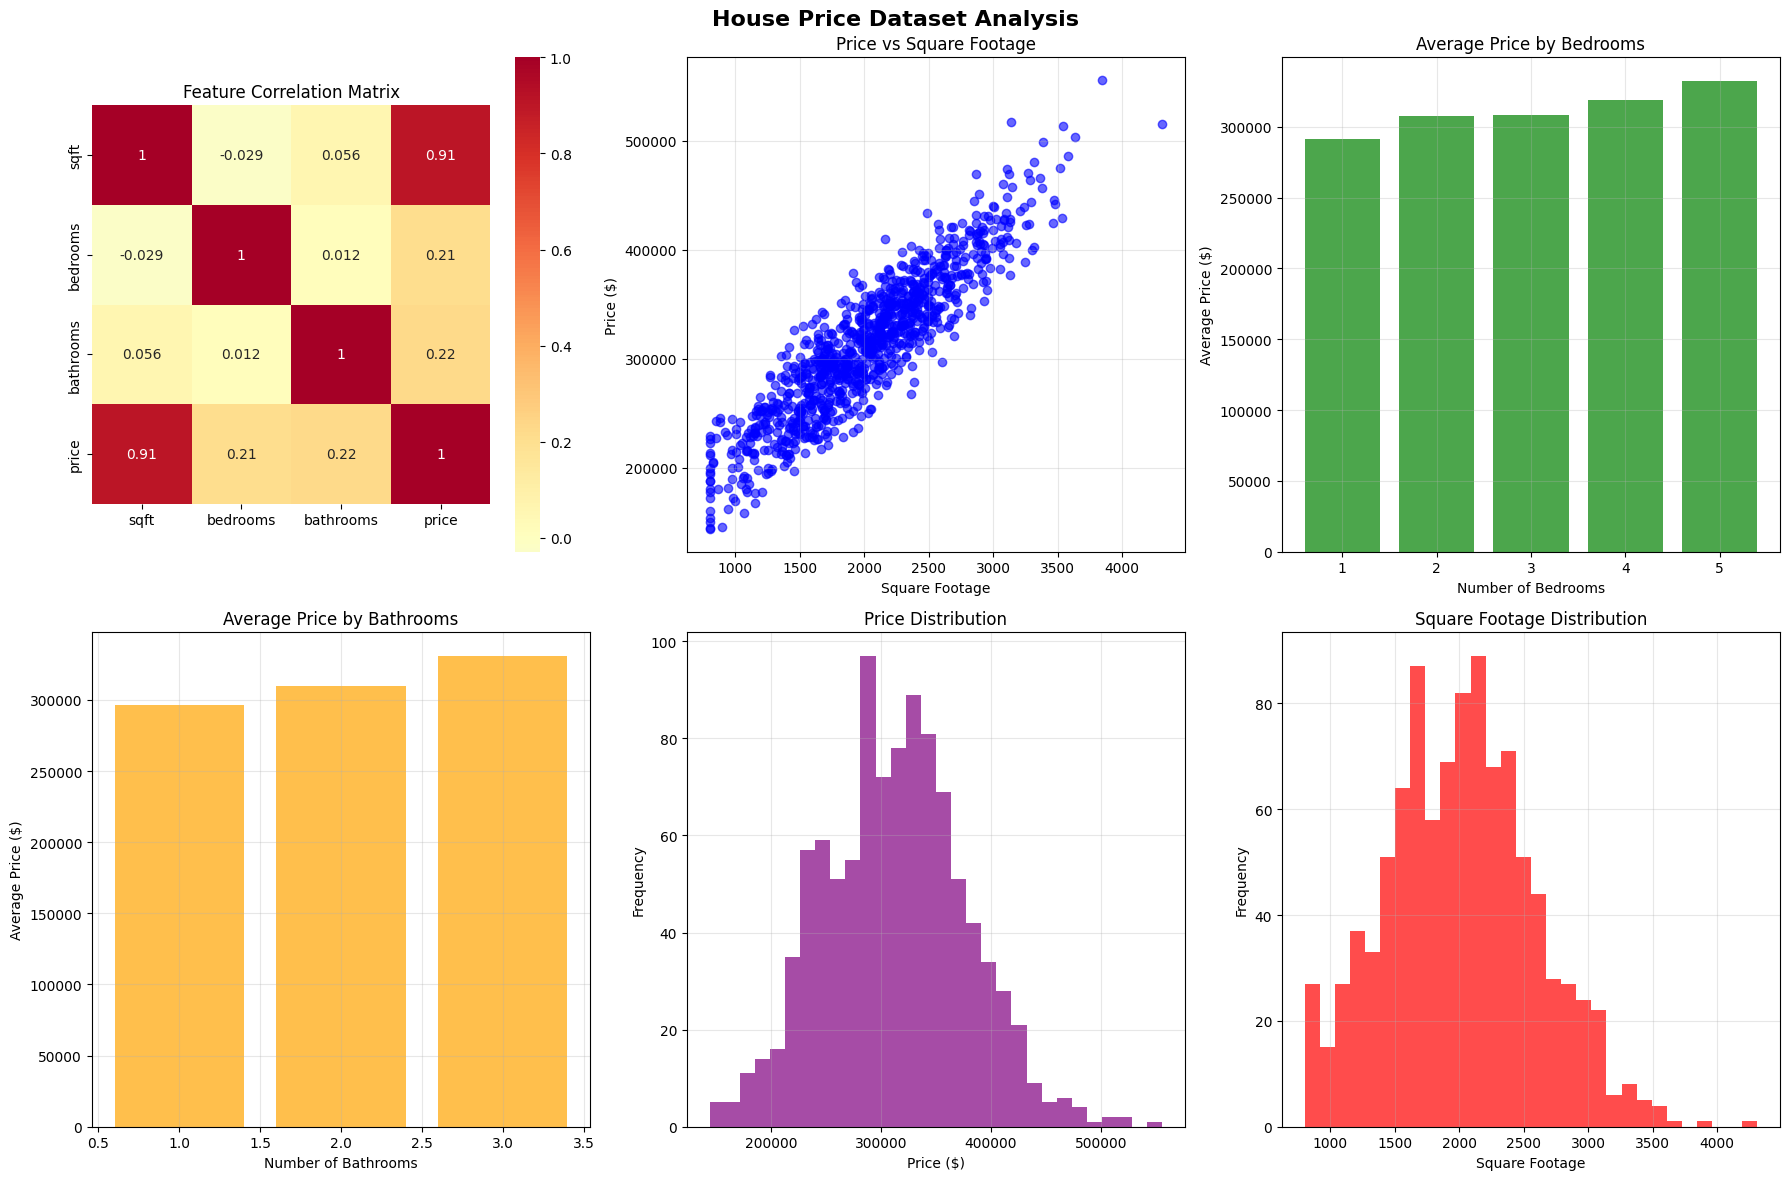


⚙ PREPROCESSING DATA
Features shape: (1000, 3)
Target shape: (1000,)
Training set: 800 samples
Test set: 200 samples

🤖 TRAINING LINEAR REGRESSION MODEL
✅ Model trained successfully!

🔮 Making predictions...
✅ Predictions completed!

📊 MODEL PERFORMANCE EVALUATION
  Metric Training   Test
R² Score   0.9009 0.9163
RMSE ($)   20,204 19,648
 MAE ($)   15,989 15,592

🔍 MODEL COEFFICIENTS
Intercept: $52,188.13
       Feature  Coefficient       Interpretation
Square Footage   100.243021     $100.24 per sqft
      Bedrooms 10430.149762  $10,430 per bedroom
     Bathrooms 13316.724457 $13,317 per bathroom

🔄 CROSS-VALIDATION RESULTS
CV R² Scores: ['0.8874', '0.8956', '0.9006', '0.9199', '0.9127']
Average CV R²: 0.9032 (±0.0234)

📈 Creating result visualizations...


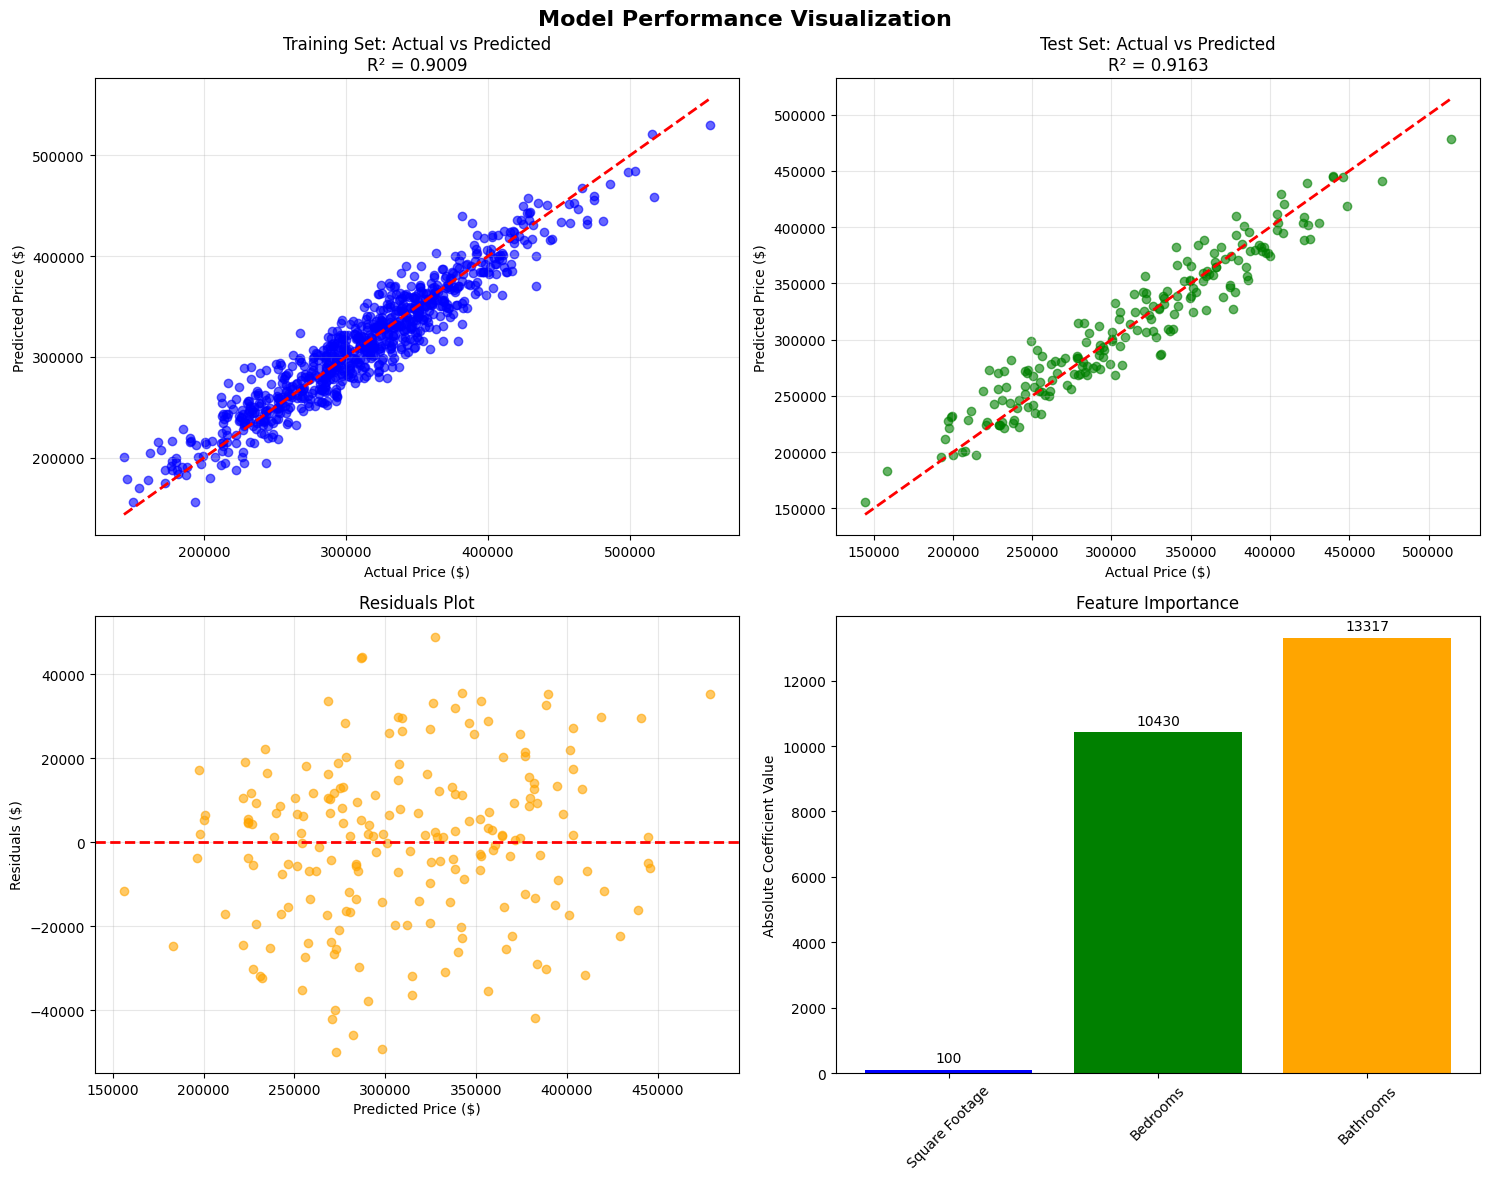


🎯 EXAMPLE PREDICTIONS

📍 Average Family Home:
-------------------------
   2,000 sqft, 3 bed, 2 bath → $310,598.07

📍 Small Starter Home:
-------------------------
   1,200 sqft, 2 bed, 1 bath → $206,656.78

📍 Large Family Home:
-------------------------
   3,500 sqft, 4 bed, 3 bath → $484,709.48

📍 Spacious Home:
-------------------------
   2,800 sqft, 3 bed, 2 bath → $390,792.49

🎮 INTERACTIVE PREDICTION
You can use the predict_house_price() function to make predictions:
Example: predict_house_price(2500, 3, 2)

📋 Detailed Prediction Example:

🏠 House Details:
   Square Footage: 2,500 sqft
   Bedrooms: 3
   Bathrooms: 2

💰 Predicted Price: $360,719.58

📊 Calculation Breakdown:
   Base Price: $52,188.13
   Square Footage: 2,500 × $100.24 = $250,607.55
   Bedrooms: 3 × $10,430.15 = $31,290.45
   Bathrooms: 2 × $13,316.72 = $26,633.45
   Total: $360,719.58

📋 PROJECT SUMMARY
✅ Dataset: 1000 houses with 3 features
✅ Model: Linear Regression
✅ Test R² Score: 0.9163
✅ Test RMSE: $19,648


In [ ]:
# House Price Prediction using Linear Regression
# Complete Google Colab Project

# Step 1: Install and Import Required Libraries
# Most libraries are pre-installed in Colab, but let's ensure we have everything

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Starting House Price Prediction Project")
print("="*60)

# Step 2: Generate Synthetic House Price Dataset
def generate_house_data(n_samples=1000):
    """
    Generate synthetic house price data for demonstration
    In a real project, you would load your actual dataset here
    """
    np.random.seed(42)  # For reproducible results

    # Generate realistic features
    sqft = np.random.normal(2000, 600, n_samples)
    sqft = np.clip(sqft, 800, 5000)  # Realistic range: 800-5000 sqft

    bedrooms = np.random.randint(1, 6, n_samples)  # 1-5 bedrooms
    bathrooms = np.random.randint(1, 4, n_samples)  # 1-3 bathrooms

    # Create realistic price based on features
    # Formula: Base price + (sqft * rate) + (bedrooms * premium) + (bathrooms * premium) + noise
    price = (50000 +  # Base price
             100 * sqft +  # $100 per sqft
             10000 * bedrooms +  # $10k per bedroom
             15000 * bathrooms +  # $15k per bathroom
             np.random.normal(0, 20000, n_samples))  # Random noise

    # Ensure realistic price range
    price = np.clip(price, 50000, 1000000)

    # Create DataFrame
    data = pd.DataFrame({
        'sqft': sqft.round(0).astype(int),
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'price': price.round(0).astype(int)
    })

    return data

# Generate the dataset
print("🏠 Generating house price dataset...")
df = generate_house_data(1000)

# Step 3: Data Exploration and Analysis
print("\n📋 DATASET OVERVIEW")
print("="*40)
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")

print("\n📊 First 5 rows:")
print(df.head())

print("\n📈 Statistical Summary:")
print(df.describe())

# Check for missing values
print(f"\n🔍 Missing values: {df.isnull().sum().sum()}")

# Step 4: Data Visualization
print("\n📊 Creating visualizations...")

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('House Price Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Matrix')

# 2. Price vs Square Footage
axes[0,1].scatter(df['sqft'], df['price'], alpha=0.6, color='blue')
axes[0,1].set_xlabel('Square Footage')
axes[0,1].set_ylabel('Price ($)')
axes[0,1].set_title('Price vs Square Footage')
axes[0,1].grid(True, alpha=0.3)

# 3. Price vs Bedrooms
bedroom_avg = df.groupby('bedrooms')['price'].mean()
axes[0,2].bar(bedroom_avg.index, bedroom_avg.values, color='green', alpha=0.7)
axes[0,2].set_xlabel('Number of Bedrooms')
axes[0,2].set_ylabel('Average Price ($)')
axes[0,2].set_title('Average Price by Bedrooms')
axes[0,2].grid(True, alpha=0.3)

# 4. Price vs Bathrooms
bathroom_avg = df.groupby('bathrooms')['price'].mean()
axes[1,0].bar(bathroom_avg.index, bathroom_avg.values, color='orange', alpha=0.7)
axes[1,0].set_xlabel('Number of Bathrooms')
axes[1,0].set_ylabel('Average Price ($)')
axes[1,0].set_title('Average Price by Bathrooms')
axes[1,0].grid(True, alpha=0.3)

# 5. Price Distribution
axes[1,1].hist(df['price'], bins=30, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Price ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Price Distribution')
axes[1,1].grid(True, alpha=0.3)

# 6. Square Footage Distribution
axes[1,2].hist(df['sqft'], bins=30, alpha=0.7, color='red')
axes[1,2].set_xlabel('Square Footage')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Square Footage Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: Data Preprocessing
print("\n⚙ PREPROCESSING DATA")
print("="*30)

# Separate features and target
X = df[['sqft', 'bedrooms', 'bathrooms']]
y = df['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['bedrooms']
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 6: Model Training
print("\n🤖 TRAINING LINEAR REGRESSION MODEL")
print("="*40)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

# Step 7: Model Predictions
print("\n🔮 Making predictions...")

# Make predictions on both sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("✅ Predictions completed!")

# Step 8: Model Evaluation
print("\n📊 MODEL PERFORMANCE EVALUATION")
print("="*50)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Display results in a formatted table
results_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE ($)', 'MAE ($)'],
    'Training': [f'{train_r2:.4f}', f'{train_rmse:,.0f}', f'{train_mae:,.0f}'],
    'Test': [f'{test_r2:.4f}', f'{test_rmse:,.0f}', f'{test_mae:,.0f}']
})

print(results_df.to_string(index=False))

# Model coefficients
print(f"\n🔍 MODEL COEFFICIENTS")
print("="*30)
print(f"Intercept: ${model.intercept_:,.2f}")

coef_df = pd.DataFrame({
    'Feature': ['Square Footage', 'Bedrooms', 'Bathrooms'],
    'Coefficient': model.coef_,
    'Interpretation': [
        f'${model.coef_[0]:.2f} per sqft',
        f'${model.coef_[1]:,.0f} per bedroom',
        f'${model.coef_[2]:,.0f} per bathroom'
    ]
})

print(coef_df.to_string(index=False))

# Step 9: Model Validation with Cross-Validation
print(f"\n🔄 CROSS-VALIDATION RESULTS")
print("="*35)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"CV R² Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"Average CV R²: {cv_scores.mean():.4f} (±{cv_scores.std() * 2:.4f})")

# Step 10: Visualization of Results
print("\n📈 Creating result visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Visualization', fontsize=16, fontweight='bold')

# 1. Training Set: Actual vs Predicted
axes[0,0].scatter(y_train, y_pred_train, alpha=0.6, color='blue')
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Price ($)')
axes[0,0].set_ylabel('Predicted Price ($)')
axes[0,0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0,0].grid(True, alpha=0.3)

# 2. Test Set: Actual vs Predicted
axes[0,1].scatter(y_test, y_pred_test, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Price ($)')
axes[0,1].set_ylabel('Predicted Price ($)')
axes[0,1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuals Plot
residuals = y_test - y_pred_test
axes[1,0].scatter(y_pred_test, residuals, alpha=0.6, color='orange')
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Predicted Price ($)')
axes[1,0].set_ylabel('Residuals ($)')
axes[1,0].set_title('Residuals Plot')
axes[1,0].grid(True, alpha=0.3)

# 4. Feature Importance
feature_importance = np.abs(model.coef_)
features = ['Square Footage', 'Bedrooms', 'Bathrooms']
bars = axes[1,1].bar(features, feature_importance, color=['blue', 'green', 'orange'])
axes[1,1].set_ylabel('Absolute Coefficient Value')
axes[1,1].set_title('Feature Importance')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, feature_importance):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(feature_importance)*0.01,
                   f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 11: Prediction Function
def predict_house_price(sqft, bedrooms, bathrooms, show_details=True):
    """
    Predict house price given features

    Parameters:
    - sqft: Square footage of the house
    - bedrooms: Number of bedrooms
    - bathrooms: Number of bathrooms
    - show_details: Whether to show calculation details

    Returns:
    - Predicted price
    """
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]

    if show_details:
        print(f"\n🏠 House Details:")
        print(f"   Square Footage: {sqft:,} sqft")
        print(f"   Bedrooms: {bedrooms}")
        print(f"   Bathrooms: {bathrooms}")
        print(f"\n💰 Predicted Price: ${prediction:,.2f}")

        # Show calculation breakdown
        breakdown = (model.intercept_ +
                    model.coef_[0] * sqft +
                    model.coef_[1] * bedrooms +
                    model.coef_[2] * bathrooms)
        print(f"\n📊 Calculation Breakdown:")
        print(f"   Base Price: ${model.intercept_:,.2f}")
        print(f"   Square Footage: {sqft:,} × ${model.coef_[0]:.2f} = ${model.coef_[0] * sqft:,.2f}")
        print(f"   Bedrooms: {bedrooms} × ${model.coef_[1]:,.2f} = ${model.coef_[1] * bedrooms:,.2f}")
        print(f"   Bathrooms: {bathrooms} × ${model.coef_[2]:,.2f} = ${model.coef_[2] * bathrooms:,.2f}")
        print(f"   Total: ${breakdown:,.2f}")

    return prediction

# Step 12: Example Predictions
print("\n🎯 EXAMPLE PREDICTIONS")
print("="*30)

examples = [
    (2000, 3, 2, "Average Family Home"),
    (1200, 2, 1, "Small Starter Home"),
    (3500, 4, 3, "Large Family Home"),
    (2800, 3, 2, "Spacious Home")
]

for sqft, bed, bath, description in examples:
    print(f"\n📍 {description}:")
    print("-" * 25)
    predicted_price = predict_house_price(sqft, bed, bath, show_details=False)
    print(f"   {sqft:,} sqft, {bed} bed, {bath} bath → ${predicted_price:,.2f}")

# Step 13: Interactive Prediction (Optional)
print(f"\n🎮 INTERACTIVE PREDICTION")
print("="*30)
print("You can use the predict_house_price() function to make predictions:")
print("Example: predict_house_price(2500, 3, 2)")

# Demonstrate the function
print(f"\n📋 Detailed Prediction Example:")
sample_prediction = predict_house_price(2500, 3, 2, show_details=True)

# Step 14: Model Summary
print(f"\n📋 PROJECT SUMMARY")
print("="*25)
print(f"✅ Dataset: {df.shape[0]} houses with {df.shape[1]-1} features")
print(f"✅ Model: Linear Regression")
print(f"✅ Test R² Score: {test_r2:.4f}")
print(f"✅ Test RMSE: ${test_rmse:,.0f}")
print(f"✅ Cross-validation R²: {cv_scores.mean():.4f}")

# Step 15: Save Results (Optional)
print(f"\n💾 SAVING RESULTS")
print("="*20)

# Save predictions to CSV
results_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_test,
    'Residual': y_test - y_pred_test
})

# Note: In Colab, files are saved to the session storage
# To download, use files.download('filename.csv')
results_df.to_csv('house_price_predictions.csv', index=False)
print("✅ Predictions saved to 'house_price_predictions.csv'")

# Save model coefficients
model_summary = pd.DataFrame({
    'Feature': ['Intercept', 'Square Footage', 'Bedrooms', 'Bathrooms'],
    'Coefficient': [model.intercept_] + list(model.coef_),
    'Interpretation': [
        f'Base price: ${model.intercept_:,.2f}',
        f'Price per sqft: ${model.coef_[0]:.2f}',
        f'Price per bedroom: ${model.coef_[1]:,.0f}',
        f'Price per bathroom: ${model.coef_[2]:,.0f}'
    ]
})

model_summary.to_csv('model_coefficients.csv', index=False)
print("✅ Model coefficients saved to 'model_coefficients.csv'")

print(f"\n🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("="*35)
print("📊 Your linear regression model is ready to use!")
print("🔍 Use predict_house_price(sqft, bedrooms, bathrooms) to make predictions")

# Optional: Download files in Colab
# Uncomment the following lines if you want to download the files
# from google.colab import files
# files.download('house_price_predictions.csv')
# files.download('model_coefficients.csv')